In [33]:
import pandas as pd
import numpy as np
import seaborn as sns

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
test = pd.read_csv("C:\\Users\\gsladyzh\\Downloads\\test_data_regno.csv", sep = ';', index_col='id')

In [36]:
test.head()

,camera_id,time_check,regno_recognize,regno_ai,regno,result_code,symbols,symbol_scores,length_scores
id,,,,,,,,,
1,844,00:00:00,У991КВ799,У991КВ799,У991КВ799,0,"[""У"", ""9"", ""9"", ""1"", ""К"", ""В"", ""7"", ""9"", ""9""]","[0.9999366998672485, 0.9999223947525024, 0.999...","[0.000000034831597162110484, 0.000000034835451..."
2,2516,00:00:00,О019УК177,О019УК177,О019УК177,0,"[""О"", ""0"", ""1"", ""9"", ""У"", ""К"", ""1"", ""7"", ""7""]","[0.9998993873596191, 0.999862790107727, 0.9999...","[0.0000000068477667980459955, 0.00000000683332..."
3,2476,00:00:00,Е175АК150,Е175АК150,Е175АК150,0,"[""Е"", ""1"", ""7"", ""5"", ""А"", ""К"", ""1"", ""5"", ""0""]","[0.9997256398200989, 0.9999269247055054, 0.999...","[0.000000002039653557162069, 0.000000002043387..."
4,1251,00:00:01,Т359ОН799,Т359ОН799,Т359ОН799,0,"[""Т"", ""3"", ""5"", ""9"", ""О"", ""Н"", ""7"", ""9"", ""9""]","[0.9998781681060791, 0.9998764991760254, 0.999...","[0.00000002880540606042814, 0.0000000289985120..."
5,2516,00:00:01,В521СУ750,В521СУ750,В521СУ750,0,"[""В"", ""5"", ""2"", ""1"", ""С"", ""У"", ""7"", ""5"", ""0""]","[0.999920129776001, 0.9999333620071411, 0.9999...","[0.000000009300508807541519, 0.000000009201486..."


# Преобразование датасета

In [37]:
test['time_check'] = pd.to_datetime(test['time_check'])

In [40]:
test['Hour'] = pd.to_datetime(test['time_check'], format='%H:%M:%S').dt.hour

## Преобразование length_scores в пандас серию

In [41]:
score_length = (pd.melt(test.length_scores.replace(['\]','\[','\,'],'',regex = True).str.split(' ').apply(pd.Series).reset_index(), 
             id_vars=['id'],
             value_name='length_scores')
     .set_index(['id'])
     .sort_index()
     )

In [42]:
score_length['variable'] = score_length['variable'].astype(int)

In [43]:
score_length = score_length.groupby('id').length_scores.agg('max')

In [44]:
test = test.merge(score_length, how = 'inner', on = 'id')

### Количество знаков в ГРЗ

In [45]:
ss = test['symbol_scores'].str.split().apply(len)

In [46]:
test = test.merge(ss, how = 'inner', on = 'id')

In [47]:
test.head()

,camera_id,time_check,regno_recognize,regno_ai,regno,result_code,symbols,symbol_scores_x,length_scores_x,Hour,length_scores_y,symbol_scores_y
id,,,,,,,,,,,,
1,844,2022-04-15 00:00:00,У991КВ799,У991КВ799,У991КВ799,0,"[""У"", ""9"", ""9"", ""1"", ""К"", ""В"", ""7"", ""9"", ""9""]","[0.9999366998672485, 0.9999223947525024, 0.999...","[0.000000034831597162110484, 0.000000034835451...",0,0.9999313354492188,9
2,2516,2022-04-15 00:00:00,О019УК177,О019УК177,О019УК177,0,"[""О"", ""0"", ""1"", ""9"", ""У"", ""К"", ""1"", ""7"", ""7""]","[0.9998993873596191, 0.999862790107727, 0.9999...","[0.0000000068477667980459955, 0.00000000683332...",0,0.9999903440475464,9
3,2476,2022-04-15 00:00:00,Е175АК150,Е175АК150,Е175АК150,0,"[""Е"", ""1"", ""7"", ""5"", ""А"", ""К"", ""1"", ""5"", ""0""]","[0.9997256398200989, 0.9999269247055054, 0.999...","[0.000000002039653557162069, 0.000000002043387...",0,0.9999988079071045,9
4,1251,2022-04-15 00:00:01,Т359ОН799,Т359ОН799,Т359ОН799,0,"[""Т"", ""3"", ""5"", ""9"", ""О"", ""Н"", ""7"", ""9"", ""9""]","[0.9998781681060791, 0.9998764991760254, 0.999...","[0.00000002880540606042814, 0.0000000289985120...",0,0.9999815225601196,9
5,2516,2022-04-15 00:00:01,В521СУ750,В521СУ750,В521СУ750,0,"[""В"", ""5"", ""2"", ""1"", ""С"", ""У"", ""7"", ""5"", ""0""]","[0.999920129776001, 0.9999333620071411, 0.9999...","[0.000000009300508807541519, 0.000000009201486...",0,0.9999921321868896,9


In [48]:
# test.drop(columns=['GRZ_score','score_min'],axis = 1)
# test.drop(test.columns[[20, 19]], axis=1)
# test['length_scores_end'] = test['length_scores_end'].astype(float)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194214 entries, 1 to 194214
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   camera_id        194214 non-null  int64         
 1   time_check       194214 non-null  datetime64[ns]
 2   regno_recognize  194214 non-null  object        
 3   regno_ai         194214 non-null  object        
 4   regno            194214 non-null  object        
 5   result_code      194214 non-null  int64         
 6   symbols          194214 non-null  object        
 7   symbol_scores_x  194214 non-null  object        
 8   length_scores_x  194214 non-null  object        
 9   Hour             194214 non-null  int64         
 10  length_scores_y  194214 non-null  object        
 11  symbol_scores_y  194214 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 19.3+ MB


## Преобразование столбцов со списками в пандас.серии

In [49]:
symbols = (pd.melt(test.symbols.replace(['\]','\[','\,','\"'],'',regex = True).str.split(' ').apply(pd.Series).reset_index(), 
             id_vars=['id'],
             value_name='GRZ')
     .set_index(['id'])
     .sort_index()
     )

In [50]:
symbol_scores = (pd.melt(test.symbol_scores_x.replace(['\]','\[','\,','\"'],'',regex = True).str.split(' ').apply(pd.Series).reset_index(), 
             id_vars=['id'],
             value_name='GRZ_score')
     .set_index(['id'])
     .sort_index()
     )

In [51]:
score_GRZ = symbols.merge(symbol_scores,how = 'inner', on = ['id','variable'])

In [52]:
score_GRZ['GRZ_score'] = score_GRZ['GRZ_score'].astype(float)

### поиск минимального и максимального скора по грз

In [53]:
max_score_GRZ = score_GRZ.groupby('id', as_index=False).apply(lambda x: x.nlargest(1,['GRZ_score'])).reset_index(level=0, drop=True)

In [54]:
mean_score_GRZ=score_GRZ.groupby('id').agg({'GRZ_score':'mean'})

In [55]:
min_score_GRZ = score_GRZ.groupby('id', as_index=False).apply(lambda x: x.nsmallest(1,['GRZ_score'])).reset_index(level=0, drop=True)

In [56]:
test = test.merge(max_score_GRZ,how='inner', on = 'id')

In [57]:
test = test.merge(min_score_GRZ,how='inner', on = 'id')

In [58]:
test = test.merge(mean_score_GRZ,how='inner', on = 'id')

In [59]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194214 entries, 1 to 194214
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   camera_id        194214 non-null  int64         
 1   time_check       194214 non-null  datetime64[ns]
 2   regno_recognize  194214 non-null  object        
 3   regno_ai         194214 non-null  object        
 4   regno            194214 non-null  object        
 5   result_code      194214 non-null  int64         
 6   symbols          194214 non-null  object        
 7   symbol_scores_x  194214 non-null  object        
 8   length_scores_x  194214 non-null  object        
 9   Hour             194214 non-null  int64         
 10  length_scores_y  194214 non-null  object        
 11  symbol_scores_y  194214 non-null  int64         
 12  variable_x       194214 non-null  object        
 13  GRZ_x            194214 non-null  object        
 14  GRZ_score_x      194

In [60]:
test = test.rename(columns = {'symbol_scores_x': 'symbol_scores',
                      'length_scores_x':'length_scores',
                      'length_scores_y': 'length_scores_end',
                      'symbol_scores_y':'index_last_score',
                      'variable_x':'pos_max_score_symbol',
                      'GRZ_x':'symbols_max_score',
                      'GRZ_score_x':'score_max',
                      'variable_y':'pos_min_score_symbol',
                      'GRZ_y':'symbols_min_score',
                      'GRZ_score_y':'score_min',
                              'GRZ_score':'score_mean'})

In [122]:
test.head()

,camera_id,time_check,regno_recognize,regno_ai,regno,result_code,symbols,symbol_scores,length_scores,Hour,length_scores_end,index_last_score,pos_max_score_symbol,symbols_max_score,score_max,pos_min_score_symbol,symbols_min_score,score_min,score_mean
id,,,,,,,,,,,,,,,,,,,
1,844,2022-04-15 00:00:00,У991КВ799,У991КВ799,У991КВ799,0,"[""У"", ""9"", ""9"", ""1"", ""К"", ""В"", ""7"", ""9"", ""9""]","[0.9999366998672485, 0.9999223947525024, 0.999...","[0.000000034831597162110484, 0.000000034835451...",0,0.999931,9,0,У,0.999937,8,9,0.999081,0.999754
2,2516,2022-04-15 00:00:00,О019УК177,О019УК177,О019УК177,0,"[""О"", ""0"", ""1"", ""9"", ""У"", ""К"", ""1"", ""7"", ""7""]","[0.9998993873596191, 0.999862790107727, 0.9999...","[0.0000000068477667980459955, 0.00000000683332...",0,0.999990,9,8,7,0.999973,1,0,0.999863,0.999911
3,2476,2022-04-15 00:00:00,Е175АК150,Е175АК150,Е175АК150,0,"[""Е"", ""1"", ""7"", ""5"", ""А"", ""К"", ""1"", ""5"", ""0""]","[0.9997256398200989, 0.9999269247055054, 0.999...","[0.000000002039653557162069, 0.000000002043387...",0,0.999999,9,2,7,0.999964,0,Е,0.999726,0.999882
4,1251,2022-04-15 00:00:01,Т359ОН799,Т359ОН799,Т359ОН799,0,"[""Т"", ""3"", ""5"", ""9"", ""О"", ""Н"", ""7"", ""9"", ""9""]","[0.9998781681060791, 0.9998764991760254, 0.999...","[0.00000002880540606042814, 0.0000000289985120...",0,0.999982,9,2,5,0.999909,6,7,0.999265,0.999653
5,2516,2022-04-15 00:00:01,В521СУ750,В521СУ750,В521СУ750,0,"[""В"", ""5"", ""2"", ""1"", ""С"", ""У"", ""7"", ""5"", ""0""]","[0.999920129776001, 0.9999333620071411, 0.9999...","[0.000000009300508807541519, 0.000000009201486...",0,0.999992,9,8,0,0.999971,4,С,0.999577,0.999892


length_scores_end = скор последнего элемента
index_last_score = позиция последнего элемента
pos_max_score_symbol = позиция символа с максимальным скором
symbols_max_score = символ с максимальным скором
score_max = максимальнй скор свимвола
pos_min_score_symbol = позиция символа с минимальным скором
symbols_min_score = символ с минимальным скором
score_min = минимальный скор символа
score_mean = средний скор по ГРЗ

### фильтрация данных
где новый алгоритм правильно предсказал грз, а старый предсказал неправильно

In [61]:
test_AI = test.loc[(test['regno_recognize'] != test['regno']) & (test['regno_ai'] == test['regno'])]
#                        

фильтрация данных, где новый алгоритм неправильно предсказал грз, а старый предсказал правильно

In [62]:
test_not_AI = test.loc[(test['regno_recognize'] == test['regno']) & (test['regno_ai'] != test['regno'])]
#                     

In [63]:
test_AI_not_AI = test.loc[(test['regno_recognize'] != test['regno']) & (test['regno_ai'] != test['regno'])]
#                       тестирование

In [64]:
test_AI['length_scores_end'] = test_AI['length_scores_end'].astype(float)

<ipython-input-64-00df16df8c1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_AI['length_scores_end'] = test_AI['length_scores_end'].astype(float)


In [65]:
test_not_AI['length_scores_end'] = test_not_AI['length_scores_end'].astype(float)

<ipython-input-65-ceefbcc68eb4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_not_AI['length_scores_end'] = test_not_AI['length_scores_end'].astype(float)


количество символов в грз,количество правильно предсказанных новым алгоритмом, и их средний скор  

In [66]:
test_AI.groupby('index_last_score',as_index= False).agg({'index_last_score': ['mean', 'count'],'length_scores_end':'mean'})

index_last_score       length_scores_end
              mean count              mean
0                7   133          0.994523
1                8  1192          0.999683
2                9  8353          0.999821

In [67]:
count_AI = test_AI.shape[0] #кол-во правильно предсказанных новым алгоритмом, где старый предсказал неправильно

In [68]:
count_AI

9678

In [69]:
count_not = test_not_AI.shape[0] #кол-во правильно предсказанных старым алгоритмом, где новый предсказал неправильно

In [70]:
count_not

16430

In [71]:
test_not_AI.groupby('index_last_score',as_index= False).agg({'index_last_score': ['mean', 'count'],'length_scores_end':'mean'})


index_last_score       length_scores_end
              mean count              mean
0                7  5009          0.894598
1                8  7711          0.955914
2                9  3710          0.982223

In [72]:
count_not_AI = test_not_AI.shape[0]

видно, что новый алгоритм лучше предсказывает грз если он состоит из 9 символов, но при этом хуже в остальных случаях

In [74]:
test['length_scores_end'] = test['length_scores_end'].astype(float)
test.groupby('index_last_score',as_index= False).agg({'index_last_score': ['mean', 'count'],'length_scores_end':'mean'})

index_last_score         length_scores_end
              mean   count              mean
0                7   10727          0.939157
1                8   42410          0.989651
2                9  141077          0.999425

### статистика по символам 

In [75]:
AI = test_AI.groupby('symbols_max_score').agg({'score_max': 'mean','camera_id':'count'}).sort_values('symbols_max_score')

In [76]:
not_AI = test_not_AI.groupby('symbols_max_score').agg({'score_max': 'mean','camera_id': 'count'}).sort_values('symbols_max_score')

In [77]:
AI_min = test_AI.groupby('index_last_score',as_index= False).agg({'score_min': 'mean','camera_id':'count'}).sort_values('score_min')

In [78]:
not_AI_min = test_not_AI.groupby('index_last_score',as_index= False).agg({'score_min': 'mean','camera_id': 'count'}).sort_values('score_min')

In [79]:
AI = AI.merge(not_AI, how = 'outer', on='symbols_max_score' )

In [80]:
AI['razmah'] = AI['score_max_x'] - AI['score_max_y']

In [81]:
AI['razmah_count'] = AI['camera_id_x'] - AI['camera_id_y']

In [82]:
AI_min = AI_min.merge(not_AI_min, how = 'outer', on='index_last_score' )

In [83]:
AI_min['razmah_min'] = AI_min['score_min_x'] - AI_min['score_min_y']

In [84]:
AI_min['razmah_count_min'] = AI_min['camera_id_x'] - AI_min['camera_id_y']

In [85]:
AI_min # статистика по длине ГРЗ  с  минимальными скорами символов

,index_last_score,score_min_x,camera_id_x,score_min_y,camera_id_y,razmah_min,razmah_count_min
0,7,0.958628,133,0.442088,5009,0.516540,-4876
1,8,0.992096,1192,0.407800,7711,0.584296,-6519
2,9,0.997069,8353,0.802537,3710,0.194532,4643


In [86]:
AI

,score_max_x,camera_id_x,score_max_y,camera_id_y,razmah,razmah_count
symbols_max_score,,,,,,
0,0.999969,571.0,0.964633,1842,0.035335,-1271.0
1,0.999981,1690.0,0.981904,1431,0.018077,259.0
2,0.999962,203.0,0.978899,1070,0.021063,-867.0
3,0.999524,193.0,0.952603,413,0.046921,-220.0
4,0.999964,290.0,0.979541,786,0.020423,-496.0
5,0.999957,307.0,0.961613,1063,0.038344,-756.0
6,0.999867,376.0,0.955988,543,0.043879,-167.0
7,0.999981,3130.0,0.991339,3868,0.008642,-738.0
8,0.999959,217.0,0.975065,846,0.024893,-629.0


In [87]:
AI_mean = test_AI.groupby('index_last_score').agg({'score_mean': 'mean','camera_id':'count'}).sort_values('index_last_score')

In [88]:
not_AI_mean = test_not_AI.groupby('index_last_score').agg({'score_mean': 'mean','camera_id': 'count'}).sort_values('index_last_score')

In [89]:
not_AI_mean

,score_mean,camera_id
index_last_score,,
7,0.746371,5009
8,0.771080,7711
9,0.954174,3710


In [90]:
AI_mean = AI_mean.merge(not_AI_mean, how = 'outer', on='index_last_score')


In [91]:
AI_mean['razmah'] = AI_mean['score_mean_x'] - AI_mean['score_mean_y']

In [92]:
AI_mean['razmah_count'] = AI_mean['camera_id_x'] - AI_mean['camera_id_y']

In [93]:
AI_mean

,score_mean_x,camera_id_x,score_mean_y,camera_id_y,razmah,razmah_count
index_last_score,,,,,,
7,0.991631,133,0.746371,5009,0.245261,-4876
8,0.998355,1192,0.771080,7711,0.227274,-6519
9,0.999530,8353,0.954174,3710,0.045356,4643


Наименьший разброс минимальных/средних скоров символов наблюдается в ГРЗ с количеством 9, также 
символ "D" новый алгоритм хуже всего распознает 

### Проверка на влияние времени суток на распознование ГРЗ

In [94]:
test_AI_1_hour = test_AI.groupby(['result_code','Hour'],as_index= False).agg({'camera_id':'count'})

<AxesSubplot:xlabel='Hour', ylabel='camera_id'>

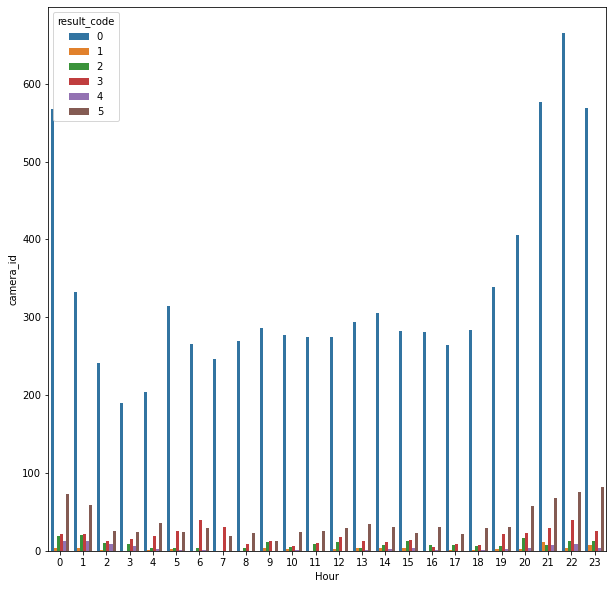

In [95]:
plt.rcParams['figure.figsize']=10,10
sns.barplot(y = 'camera_id', x = 'Hour' , data = test_AI_1_hour, hue = 'result_code' )

In [96]:
test_not_AI_hour = test_not_AI.groupby(['result_code','Hour'],as_index= False).agg({'camera_id':'count'})

<AxesSubplot:xlabel='Hour', ylabel='camera_id'>

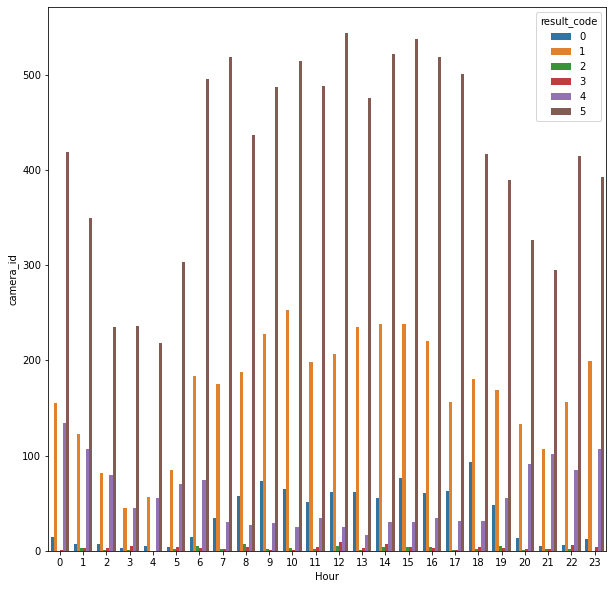

In [97]:
sns.barplot(y = 'camera_id', x = 'Hour' , data = test_not_AI_hour, hue = 'result_code' )

можно предположить, что в ночное время, новый алгоритм справляется лучше, т к пики приходятся на ночное время, но это можно списать, на то что ночью водители чаще нарушают, т к на дорогах нет машин и машины передвигаются быстрее


In [98]:
AI_сamera = test_AI.groupby('camera_id',as_index = False).agg({'score_mean': 'mean','result_code':'count'}).sort_values('score_mean')

In [99]:
not_AI_camera = test_not_AI.groupby('camera_id',as_index = False).agg({'score_mean': 'mean','result_code':'count'}).sort_values('score_mean')

In [100]:
AI_сamera = AI_сamera.merge(not_AI_camera,how ='outer', on = 'camera_id')

In [101]:
AI_сamera

,camera_id,score_mean_x,result_code_x,score_mean_y,result_code_y
0,786,0.882213,1.0,0.743150,21.0
1,5769,0.943679,4.0,0.801596,37.0
2,3743,0.944960,6.0,0.707434,10.0
3,788,0.972090,2.0,0.771469,18.0
4,1149,0.977158,3.0,0.846750,48.0
...,...,...,...,...,...
914,8442,NaN,NaN,0.999862,1.0
915,8830,NaN,NaN,0.999899,1.0
916,5337,NaN,NaN,0.999913,2.0
917,6094,NaN,NaN,0.999929,1.0


In [102]:
AI_сamera.isnull().sum()

camera_id          0
score_mean_x     202
result_code_x    202
score_mean_y      29
result_code_y     29
dtype: int64

In [103]:
camera_not_AI = camera_not_AI = AI_сamera.loc[AI_сamera['score_mean_x'].isnull()]

на 29 камерах, новый алгоритм ни разу не ошибся, в то время, как старый ошибался


In [104]:
count_AI_all = test.loc[(test['regno_recognize'] == test['regno'])]

In [105]:
count_AI_new_all = test.loc[(test['regno_ai'] == test['regno'])]

In [106]:
count_AI_all.shape[0]

183103

In [107]:
count_AI_new_all.shape[0]

176351

In [123]:
test.loc[test['symbols_min_score']=='D']

,camera_id,time_check,regno_recognize,regno_ai,regno,result_code,symbols,symbol_scores,length_scores,Hour,length_scores_end,index_last_score,pos_max_score_symbol,symbols_max_score,score_max,pos_min_score_symbol,symbols_min_score,score_min,score_mean
id,,,,,,,,,,,,,,,,,,,
2923,8406,2022-04-15 00:19:40,АО633208,036D022,АО633208,1,"[""0"", ""3"", ""6"", ""D"", ""0"", ""2"", ""2""]","[0.4536544978618622, 0.8322334885597229, 0.994...","[0.0003294070775154978, 0.00032968790037557483...",0,0.522891,7,2,6,0.994161,3,D,0.237004,0.572003
3830,2473,2022-04-15 00:26:01,I_МК777,151D17777,IМК777,5,"[""1"", ""5"", ""1"", ""D"", ""1"", ""7"", ""7"", ""7"", ""7""]","[0.9266636371612549, 0.9765215516090393, 0.785...","[0.000006501989901153138, 0.000006485819540102...",0,0.973200,9,8,7,0.999052,3,D,0.592541,0.844905
4532,6361,2022-04-15 00:31:02,35QU113,331D031,35QU113,5,"[""3"", ""3"", ""1"", ""D"", ""0"", ""3"", ""1""]","[0.3546190559864044, 0.7555138468742371, 0.458...","[0.00004583180998452008, 0.0000456228772236499...",0,0.972103,7,1,3,0.755514,3,D,0.351241,0.505199
5179,737,2022-04-15 00:35:29,35RС280,3К5D660,35RС280,5,"[""3"", ""К"", ""5"", ""D"", ""6"", ""6"", ""0""]","[0.424351304769516, 0.4316149353981018, 0.4639...","[0.00010353925608796999, 0.0001033678854582831...",0,0.945248,7,6,0,0.724160,3,D,0.367080,0.489247
7244,1121,2022-04-15 00:50:42,71UА077,170D00777,71UА077,5,"[""1"", ""7"", ""0"", ""D"", ""0"", ""0"", ""7"", ""7"", ""7""]","[0.8254249691963196, 0.9990645051002502, 0.608...","[0.00009998602035921067, 0.0001003481738734990...",0,0.518265,9,1,7,0.999065,3,D,0.422570,0.752308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180516,738,2022-04-15 22:29:05,35QS835,35МD533,35QS835,5,"[""3"", ""5"", ""М"", ""D"", ""5"", ""3"", ""3""]","[0.5897332429885864, 0.8802804350852966, 0.570...","[0.00002291775308549404, 0.0000228559420065721...",22,0.949534,7,1,5,0.880280,3,D,0.382913,0.623865
181970,7087,2022-04-15 22:38:56,36GD230,336D022,36GD230,5,"[""3"", ""3"", ""6"", ""D"", ""0"", ""2"", ""2""]","[0.27785393595695496, 0.7296532392501831, 0.99...","[0.00042964163003489375, 0.0004298592393752187...",22,0.539012,7,2,6,0.993688,3,D,0.272902,0.524323
183210,6114,2022-04-15 22:47:07,75UU075,17МD001,75UU075,5,"[""1"", ""7"", ""М"", ""D"", ""0"", ""0"", ""1""]","[0.534123957157135, 0.761878252029419, 0.69398...","[0.000014639965229434893, 0.000014645439478044...",22,0.993898,7,4,0,0.862157,3,D,0.252516,0.595407


In [109]:
pos_max_score_symbol

NameError: name 'pos_max_score_symbol' is not defined

In [110]:
AI_mean_pos = test_AI.groupby('pos_max_score_symbol').agg({'score_max': 'mean','camera_id':'count'}).sort_values('pos_max_score_symbol')

In [111]:
not_AI_mean_pos = test_not_AI.groupby('pos_max_score_symbol').agg({'score_max': 'mean','camera_id': 'count'}).sort_values('pos_max_score_symbol')

In [114]:
not_AI_mean_pos

,score_max,camera_id
pos_max_score_symbol,,
0,0.974312,903
1,0.976377,2631
2,0.979880,3344
3,0.978159,2072
4,0.966419,1405
5,0.975389,822
6,0.984119,4184
7,0.987954,893
8,0.991670,176


In [115]:
AI_mean_pos

,score_max,camera_id
pos_max_score_symbol,,
0,0.999953,186
1,0.999813,603
2,0.999966,1224
3,0.999935,1157
4,0.999969,944
5,0.999957,286
6,0.999983,3377
7,0.999990,1445
8,0.999971,456


In [116]:
AI_mean_pos = AI_mean_pos.merge(not_AI_mean_pos, how = 'outer', on='pos_max_score_symbol')


In [119]:
AI_mean_pos['razmah'] = AI_mean_pos['score_max_x'] - AI_mean_pos['score_max_y']

In [120]:
AI_mean_pos['razmah_count'] = AI_mean_pos['camera_id_x'] - AI_mean_pos['camera_id_y']

In [ ]:
позиция символов, их средний максимасльный скор,их количество по позиции, и размах 

In [121]:
AI_mean_pos

,score_max_x,camera_id_x,score_max_y,camera_id_y,razmah_count,razmah
pos_max_score_symbol,,,,,,
0,0.999953,186,0.974312,903,-717,0.025642
1,0.999813,603,0.976377,2631,-2028,0.023436
2,0.999966,1224,0.979880,3344,-2120,0.020086
3,0.999935,1157,0.978159,2072,-915,0.021776
4,0.999969,944,0.966419,1405,-461,0.033549
5,0.999957,286,0.975389,822,-536,0.024568
6,0.999983,3377,0.984119,4184,-807,0.015864
7,0.999990,1445,0.987954,893,552,0.012036
8,0.999971,456,0.991670,176,280,0.008301


минимальная разница между максимальнымы скорами и положительный размах между количеством, говорит о том, что новый алгоритм лучше распознает последний символ ГРЗ, чем старый

## Вывод

1. Если старый алгоритм распознает, что количество символом меньше 9, а новый 9 символов, то в таком случае оптимальным алгоритмом распознования будет новый, основываясь на данных выше(новый алгоритм лучше предсказывает грз если он состоит из 9 символов(8353 против 3710),Наименьший разброс скоров минимальных/средних (0.045356,0.194532), между новым алгоритмом и старым, наблюдается в ГРЗ с количеством символов 9, минимальная разница между максимальнымы скорами и положительный размах между количеством, говорит о том, что новый алгоритм лучше распознает последний символ ГРЗ, чем старый )
2. Таким образом, если грз состоит из 9 символов и не состоит из латинских букв, то это позволит увеличить кол-во правильно предсказанных ГРЗ на 8353 - 3710 = 4643